In [37]:
import numpy as np
from branch_and_bound import branch_and_bound_solver, test_branch_and_bound
from timeit import default_timer

In [38]:
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_formats = ['svg']

In [40]:
dim = 2
H = np.array([
    [3, 5],
    [-2, 7]
])
# x = np.array([1, -2])
# y = H @ x + np.random.normal(0, 0.01, size=dim)
y = np.array([2, -2])
upper_bound, solution, total_nodes = branch_and_bound_solver(H, y)
# print(np.allclose(x, solution), total_nodes)

In [3]:
dim = 2
set_size = 5

H = np.random.uniform(-1, 1, size=(dim, dim))
x = np.random.randint(-set_size, +set_size+1, size=dim)
y = H @ x + np.random.normal(0, 0.01, size=dim)
start_time = default_timer()
upper_bound, solution, total_nodes = branch_and_bound_solver(H, y)
print(default_timer() - start_time)
print(np.allclose(x, solution), total_nodes)

0.005803459000000011
True 4


In [4]:
dim = 50
set_size = 10

test_branch_and_bound(dim, set_size, n_tests=10)

100%|██████████| 10/10 [00:04<00:00,  2.23it/s]


(1.0, 130.8)

In [3]:
dim_range = [5, 10, 25, 50, 75, 100, 150, 200, 250]
n_tests_range = [100, 100, 50, 10, 5, 5, 1, 1, 1]
set_size = 10
stat_dim = {'dim': [], 'solved': [], 'total_nodes': [], 'time': []}
for dim, n_tests in zip(dim_range, n_tests_range):
    start_time = default_timer()
    solved, total_nodes = test_branch_and_bound(dim, set_size, n_tests)
    stat_dim['dim'].append(dim)
    stat_dim['solved'].append(solved)
    stat_dim['total_nodes'].append(total_nodes)
    stat_dim['time'].append((default_timer() - start_time) / n_tests)

100%|██████████| 1/1 [04:01<00:00, 241.28s/it]


In [11]:
dim_range_strong = [5, 10, 25, 50, 75, 100, 125]
n_tests_range_strong = [10, 10, 5, 1, 1, 1, 1]
set_size = 10
stat_strong_dim = {'dim': [], 'solved': [], 'total_nodes': [], 'time': []}
for dim, n_tests in zip(dim_range_strong, n_tests_range_strong):
    start_time = default_timer()
    solved, total_nodes = test_branch_and_bound(dim, set_size, n_tests, strong=True)
    stat_strong_dim['dim'].append(dim)
    stat_strong_dim['solved'].append(solved)
    stat_strong_dim['total_nodes'].append(total_nodes)
    stat_strong_dim['time'].append((default_timer() - start_time) / n_tests)

  0%|          | 0/1 [06:52<?, ?it/s]


KeyboardInterrupt: 

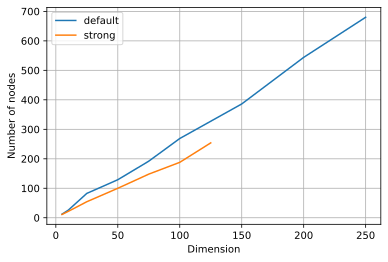

In [26]:
plt.plot(stat_dim['dim'], stat_dim['total_nodes'], label='default')
plt.plot(stat_strong_dim['dim'], stat_strong_dim['total_nodes'], label='strong')
plt.xlabel('Dimension')
plt.ylabel('Number of nodes')
plt.grid()
plt.legend()
plt.savefig('plots/branch_and_bound_n_nodes_dim.pdf', bbox_inches='tight')
plt.show()

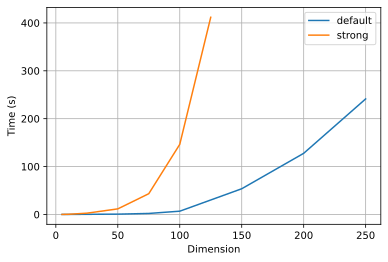

In [27]:
plt.plot(stat_dim['dim'], stat_dim['time'], label='default')
plt.plot(stat_strong_dim['dim'], stat_strong_dim['time'], label='strong')
plt.xlabel('Dimension')
plt.ylabel('Time (s)')
plt.grid()
plt.legend()
plt.savefig('plots/branch_and_bound_time_dim.pdf', bbox_inches='tight')
plt.show()

In [14]:
dim = 20
n_tests_range = [100, 100, 100, 100, 100, 100]
set_size_range = [10, 25, 50, 100, 200]
stat_set_size = {'set_size': [], 'solved': [], 'total_nodes': [], 'time': []}
for set_size, n_tests in zip(set_size_range, n_tests_range):
    start_time = default_timer()    
    solved, total_nodes = test_branch_and_bound(dim, set_size, n_tests)
    stat_set_size['set_size'].append(set_size)
    stat_set_size['solved'].append(solved)
    stat_set_size['total_nodes'].append(total_nodes)
    stat_set_size['time'].append((default_timer() - start_time) / n_tests)

100%|██████████| 100/100 [00:23<00:00,  4.30it/s]


In [17]:
dim = 20
n_tests_range = [10, 10, 10, 10, 10, 10]
set_size_range = [10, 25, 50, 100, 200]
stat_strong_set_size = {'set_size': [], 'solved': [], 'total_nodes': [], 'time': []}
for set_size, n_tests in zip(set_size_range, n_tests_range):
    start_time = default_timer()    
    solved, total_nodes = test_branch_and_bound(dim, set_size, n_tests, strong=True)
    stat_strong_set_size['set_size'].append(set_size)
    stat_strong_set_size['solved'].append(solved)
    stat_strong_set_size['total_nodes'].append(total_nodes)
    stat_strong_set_size['time'].append((default_timer() - start_time) / n_tests)

100%|██████████| 10/10 [00:18<00:00,  1.83s/it]


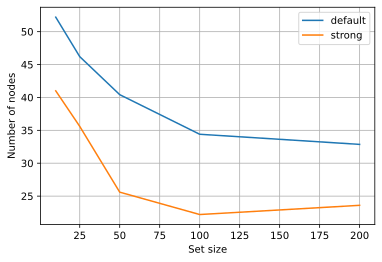

In [28]:
plt.plot(stat_set_size['set_size'], stat_set_size['total_nodes'], label='default')
plt.plot(stat_strong_set_size['set_size'], stat_strong_set_size['total_nodes'], label='strong')
plt.xlabel('Set size')
plt.ylabel('Number of nodes')
plt.grid()
plt.legend()
plt.savefig('plots/branch_and_bound_n_nodes_set_size.pdf', bbox_inches='tight')
plt.show()

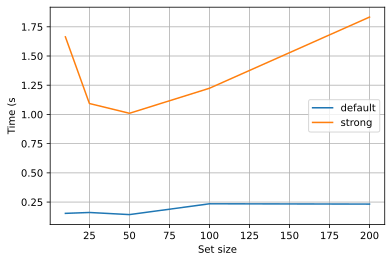

In [29]:
plt.plot(stat_set_size['set_size'], stat_set_size['time'], label='default')
plt.plot(stat_strong_set_size['set_size'], stat_strong_set_size['time'], label='strong')
plt.xlabel('Set size')
plt.ylabel('Time (s')
plt.grid()
plt.legend()
plt.savefig('plots/branch_and_bound_time_set_size.pdf', bbox_inches='tight')
plt.show()

In [35]:
from timeit import default_timer
from scipy.optimize import lsq_linear

dim_range = [5, 10, 25, 50, 75, 100, 150, 200, 250, 500, 1000]
times = []
for dim in dim_range:
    H = np.random.uniform(-1, 1, size=(dim, dim))
    x = np.random.randint(-5, 5, size=dim)
    y = H @ x + np.random.normal(0, 0.001, size=dim)
    lb = -np.ones(shape=dim)
    ub = np.ones(shape=dim)
    start_time = default_timer()
    lsq_linear(H, y, bounds=(lb, ub), max_iter=100)
    times.append(default_timer() - start_time)

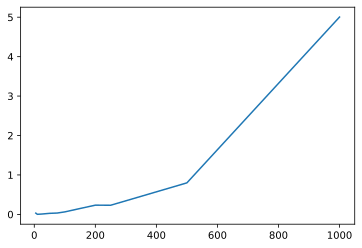

In [36]:
plt.plot(dim_range, times)